# YOLOv8

In this project, YOLOv8 is use to train the model for staplet detection.
You can check [Ultralytics documentation](https://docs.ultralytics.com/) for more details or [Github repo](https://github.com/ultralytics/ultralytics)

In [2]:
!nvidia-smi

Fri Feb 28 17:24:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  |   00000000:01:00.0  On |                  Off |
|  0%   41C    P8             16W /  450W |    1544MiB /  24564MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Sep_12_02:55:00_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.77
Build cuda_12.6.r12.6/compiler.34841621_0


### Import dependencies

In [3]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import random

### First let's check the dataset

In [4]:

path_to_train_images = '../data3/train/images/'
path_to_train_labels = '../data3/train/labels/'

# Get a list of image files
image_files = [f for f in os.listdir(path_to_train_images) if f.endswith('.png') or f.endswith('.jpg')]

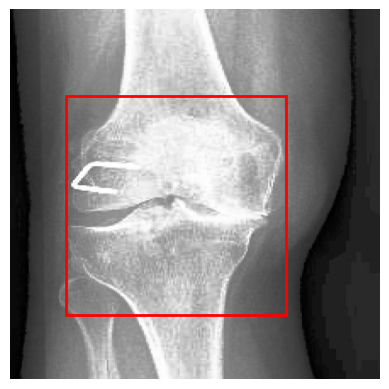

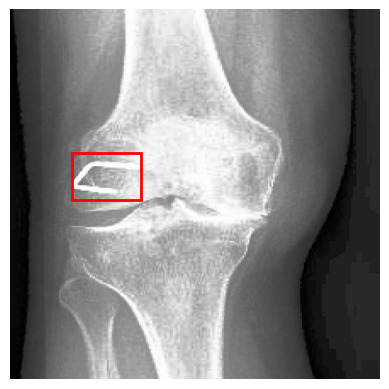

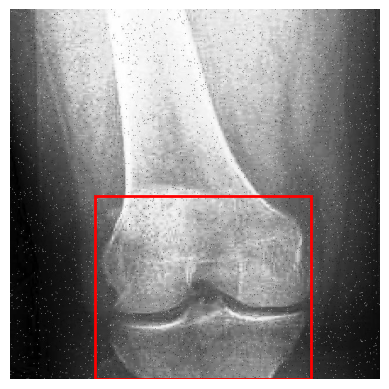

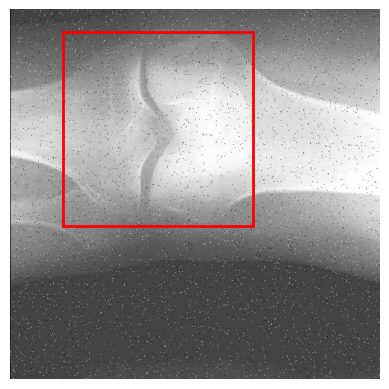

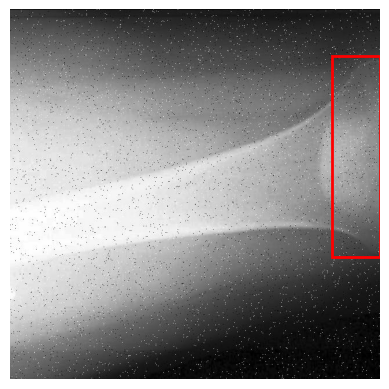

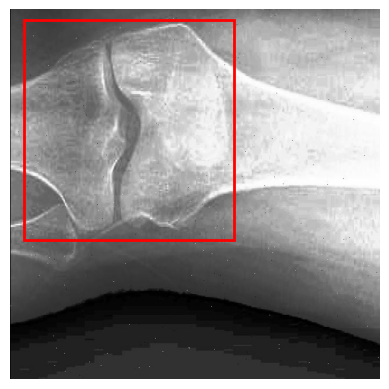

In [5]:
# Check if there are enough images to sample
if len(image_files) >= 5:
    # Choose 5 random images
    random_images = random.sample(image_files, 5)

    # Plot each random image with its annotations
    for image_file in random_images:
        image_path = os.path.join(path_to_train_images, image_file)
        label_path = os.path.join(path_to_train_labels, image_file.replace('.png', '.txt').replace('.jpg', '.txt'))

        # Load the image using OpenCV
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Read label file and extract bounding box coordinates
        with open(label_path, 'r') as label_file:
            lines = label_file.readlines()
            annotations = [list(map(float, line.strip().split()[1:])) for line in lines]

        # Convert annotations to pixel coordinates
        height, width, _ = img.shape
        for annotation in annotations:
            x, y, w, h = annotation
            x = int(x * width)
            y = int(y * height)
            w = int(w * width)
            h = int(h * height)

            # Draw bounding box on the image using Matplotlib
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.gca().add_patch(plt.Rectangle((x - w // 2, y - h // 2), w, h, linewidth=2, edgecolor='r', facecolor='none'))
            plt.show()

else:
    print("Not enough images to sample.")

### Let's train the model

We're using the smallest model `yolov8s`. Depending on you data and aimed accuracy, you can use `yolov8n`, `yolov8m`, `yolov8l` or `yolov8x`

In [7]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
results = model.train(data='D:\RHS\FusionVision-main\data3\data.yaml', epochs=300, imgsz=640, device=[0])

"D:\RHS\FusionVision-main\data3\data.yaml"



c:\Users\ge75wix\.conda\envs\Thesis_RHS\Lib\site-packages\ultralytics\nn\tasks.py:518: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cp

'D:\\RHS\\FusionVision-main\\data3\\data.yaml'

In [15]:
# Load model
model = YOLO('../yolo_train/runs/detect/train/weights/best.pt')

# Run inference
results = model.predict('../data3/valid/images/00162704_1x1_jpg.rf.ac43274b832fb2189f50d5571c2ba0af.jpg', save=True, conf=0.5)





image 1/1 d:\RHS\FusionVision-main\yolo_train\..\data3\valid\images\00162704_1x1_jpg.rf.ac43274b832fb2189f50d5571c2ba0af.jpg: 640x640 1 Knee, 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


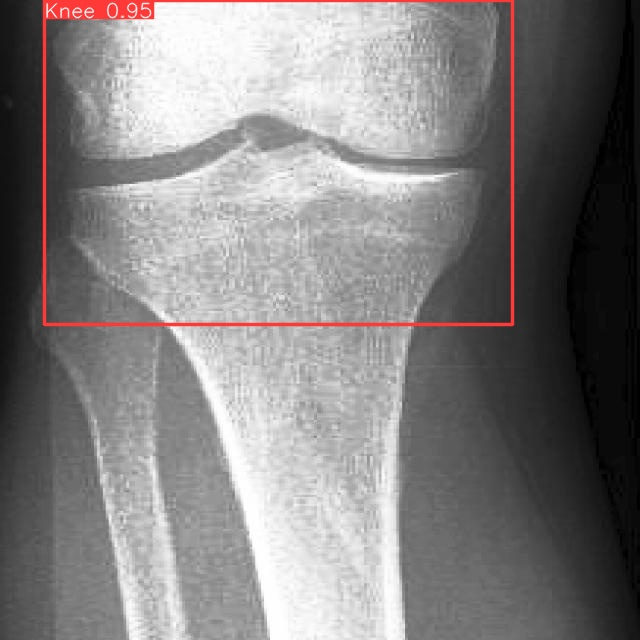

In [16]:
from IPython.display import Image
import os

image_path = os.path.join('../yolo_train/runs/detect/predict', '00162704_1x1_jpg.rf.ac43274b832fb2189f50d5571c2ba0af.jpg')

# Check if the file exists
if os.path.isfile(image_path):
    img = Image(filename=image_path)
    display(img)
else:
    print('Image file not found.')